In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data.utils import string_to_list as st
import scienceplots
plt.style.use(['science', 'ieee', 'grid', 'vibrant', 'no-latex'])


In [48]:
# Read and adjust data.
df = pd.read_csv('../data/all-data-clean-tokenized.csv')

# Create year, month and year-month features.
df['year'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.year
df['year-month'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.strftime('%Y-%m')

# Fix the problem with lists in pandas columns.
df['phrases'] = df['phrases'].apply(st)

# Filter out 2023.
#df = df.loc[df['year'] < 2023]


In [7]:
df.head(2)

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,clean_text,phrases,year,year-month
0,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)",https://www.congreso.es:443/public_oficiales/L...,PNV,"Gracias, señora presidenta. Esta investidura n...","['investidura', 'ver', 'cuatro', 'años', 'aque...","[investidura, ver, cuatro_años, aquella, oport...",2000,2000-04
1,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Frutos Gras, Francisco (GIU)",https://www.congreso.es:443/public_oficiales/L...,IU,"Señora presidenta, seño- ras y señores diputad...","['candidato', 'primer', 'lugar', 'lógico', 're...","[candidato, primer_lugar, lógico, reconocimien...",2000,2000-04


In [153]:
term = 'populista'
groups = ['UP'] #, 'VOX', 'UP', 'CS']

corpus = df

for group in groups:
    mask = corpus.loc[corpus['political_group'] ==
                      group].phrases.apply(lambda x: term in x)
    occurrence = corpus.loc[corpus['political_group'] == group][mask].groupby(
        ['year-month']).count()['phrases']
    #print(f'Group:{group}, Occurrence: {occurrence}')


In [155]:
term = 'populistas'
groups = ['UP'] #, 'VOX', 'UP', 'CS']

corpus = df

for group in groups:
    mask = corpus.loc[corpus['political_group'] == group].phrases.apply(lambda x: term in x)
    occurrence = corpus.loc[corpus['political_group'] == group][mask].groupby(['year-month']).count()['phrases']

    #with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        #print(f'Group:{group}, Occurrence: {occurrence}')


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_77723/3793020968.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


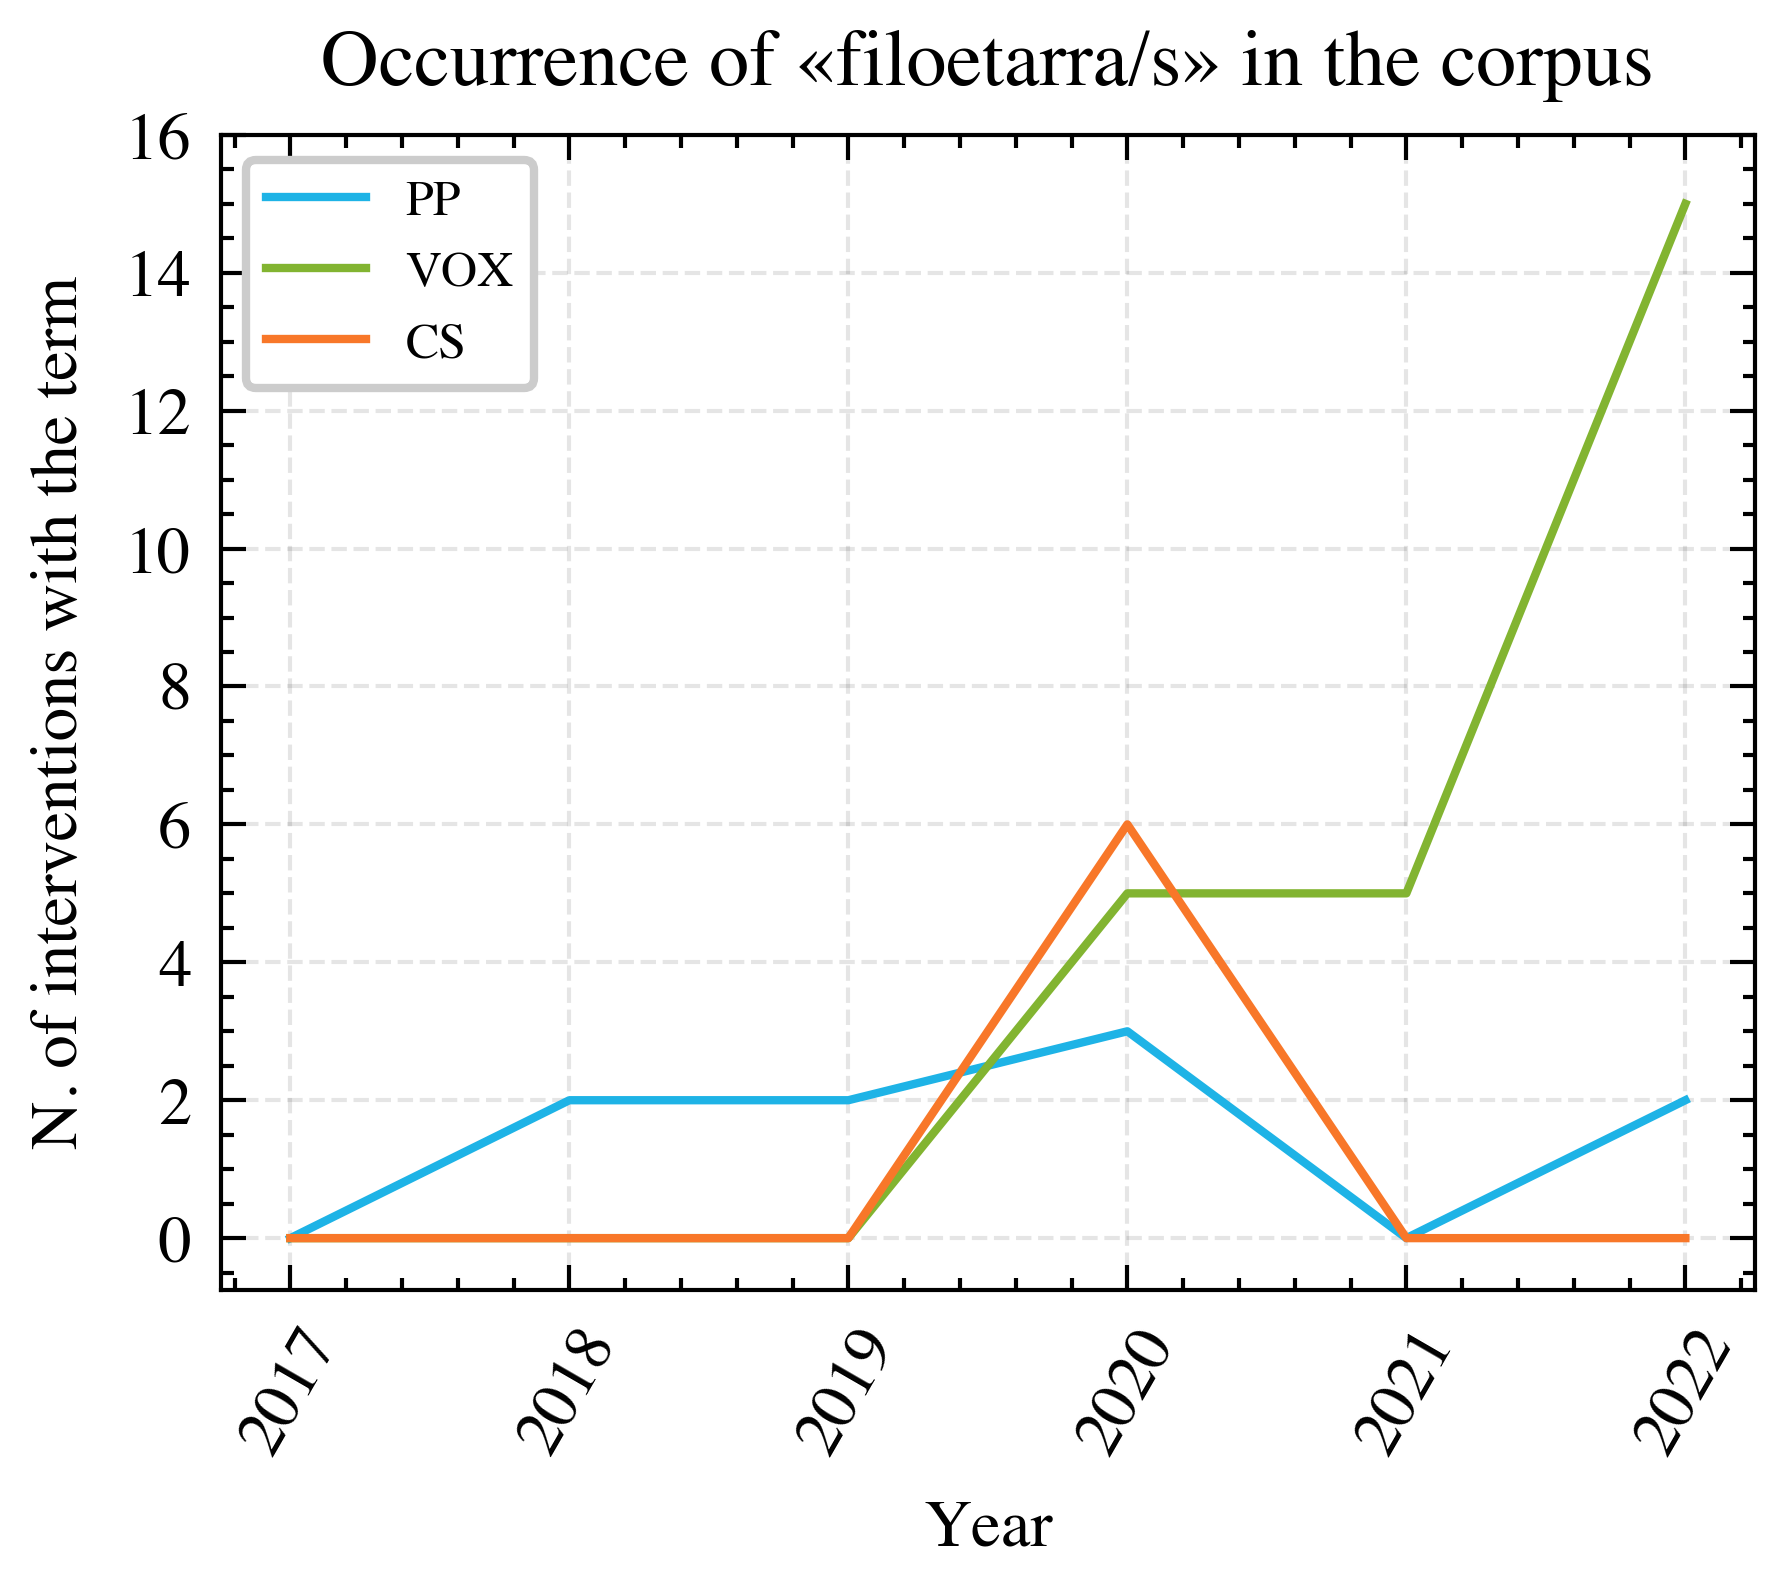

In [156]:
# Filoetarra/s.

fig, ax = plt.subplots()

years = [2017, 2018, 2019, 2020, 2021, 2022]
PP = [0, 2, 2, 3, 0, 2]
VOX = [0, 0, 0, 5, 5, 15]
CS = [0, 0, 0, 6, 0, 0]

ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
    

ax.set_xticks(years)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'N. of interventions with the term')
ax.set_title(f'Occurrence of «filoetarra/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_77723/4136852994.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


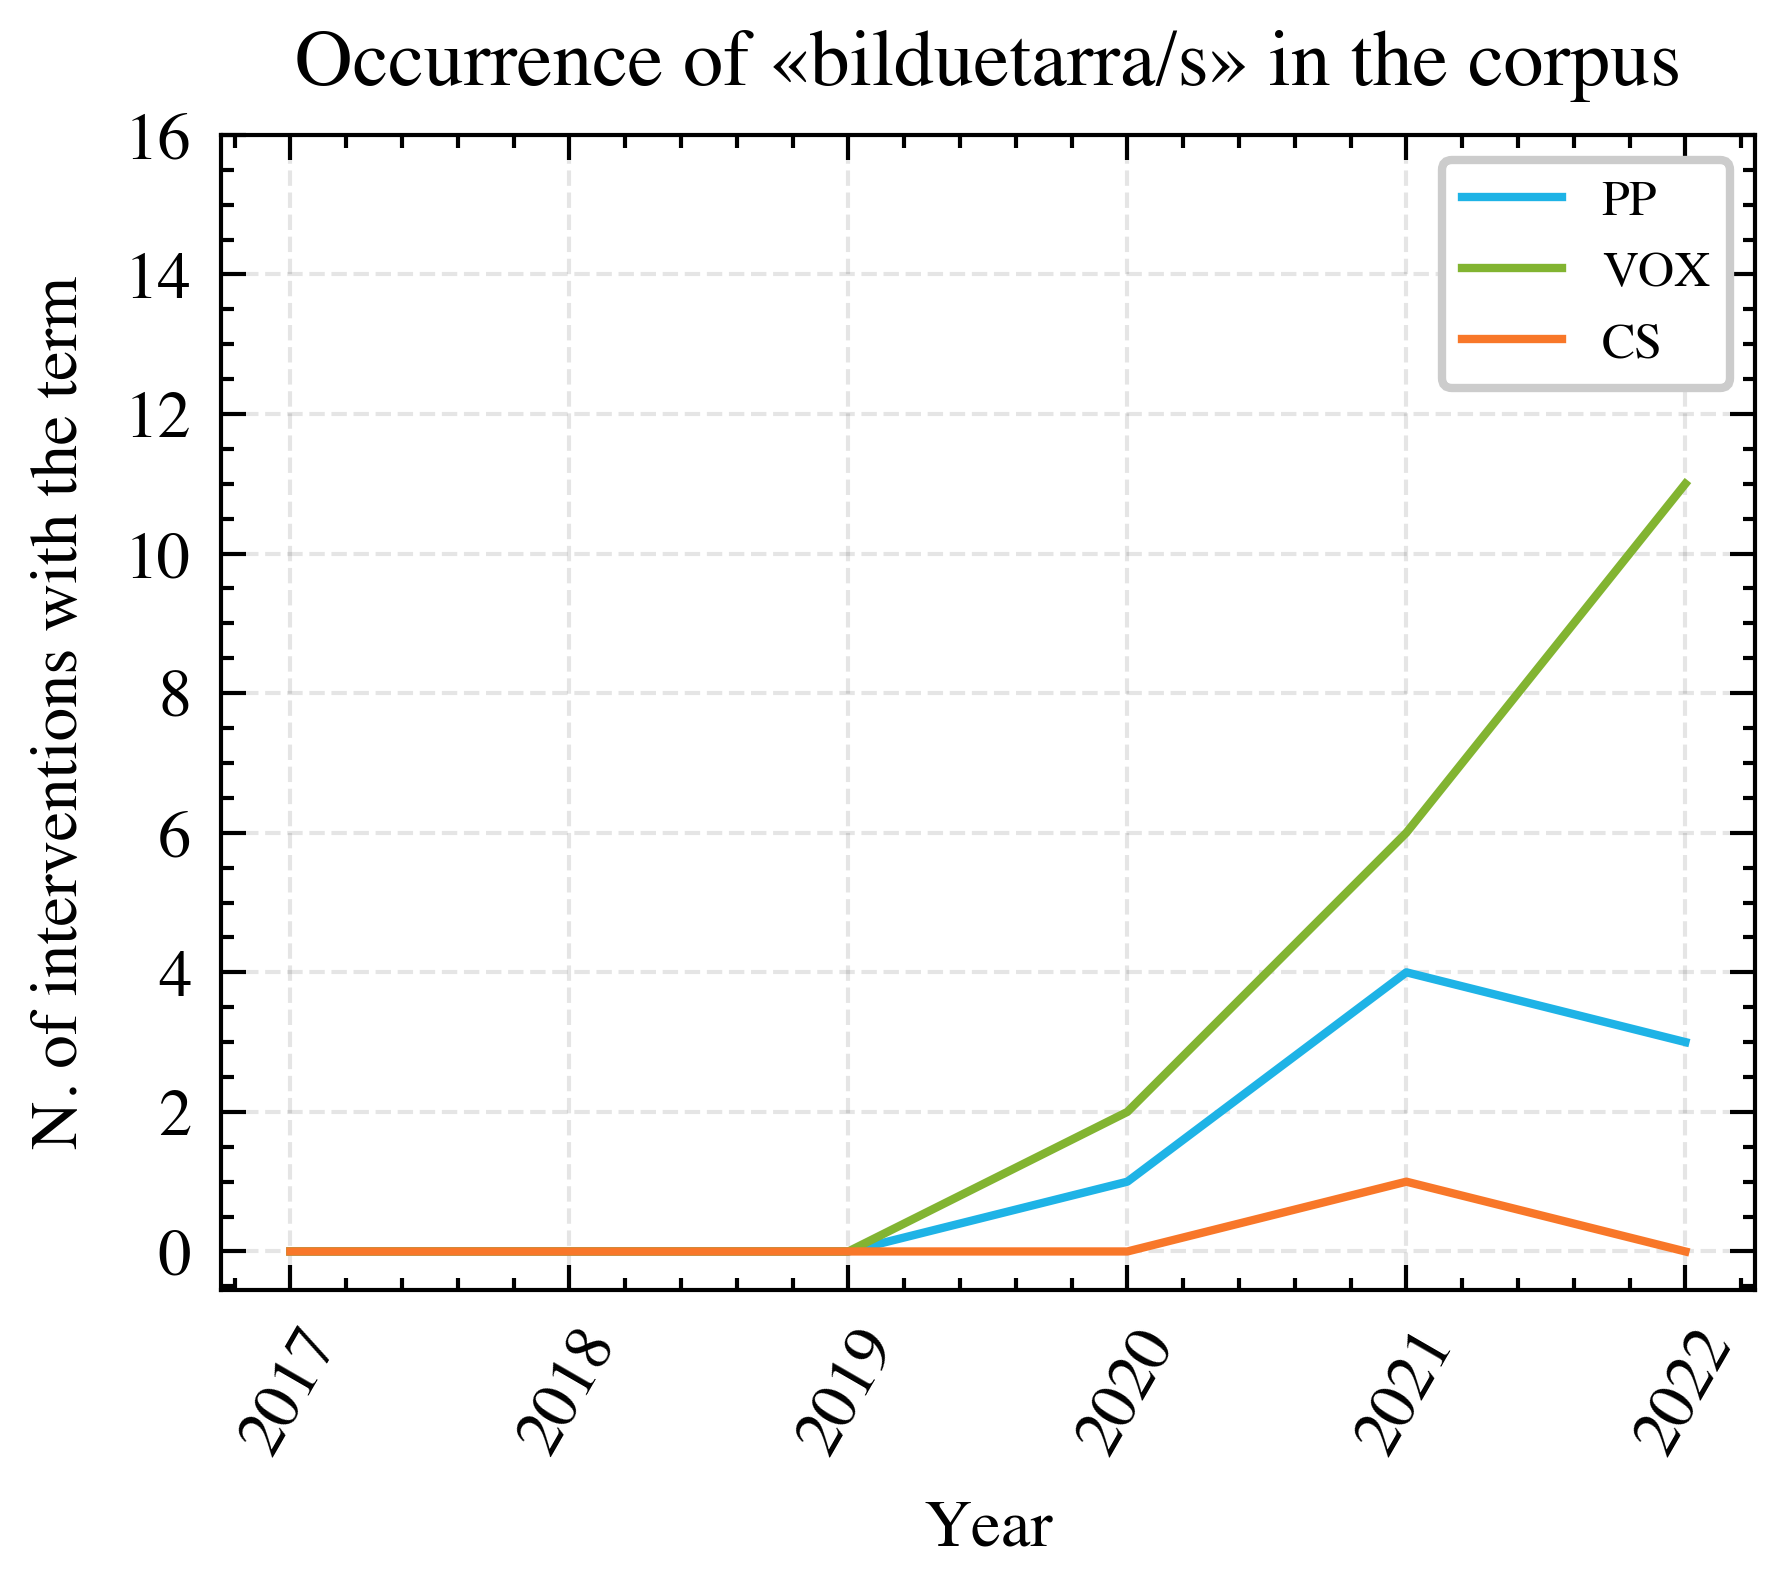

In [157]:
# Bilduetarra/s.

fig, ax = plt.subplots()

years = [2017, 2018, 2019, 2020, 2021, 2022]
PP = [0, 0, 0, 1, 4, 3]
VOX = [0, 0, 0, 2, 6, 11]
CS = [0, 0, 0, 0, 1, 0]

ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')

ax.set_xticks(years)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'N. of interventions with the term')
ax.set_title(f'Occurrence of «bilduetarra/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_77723/2766798561.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


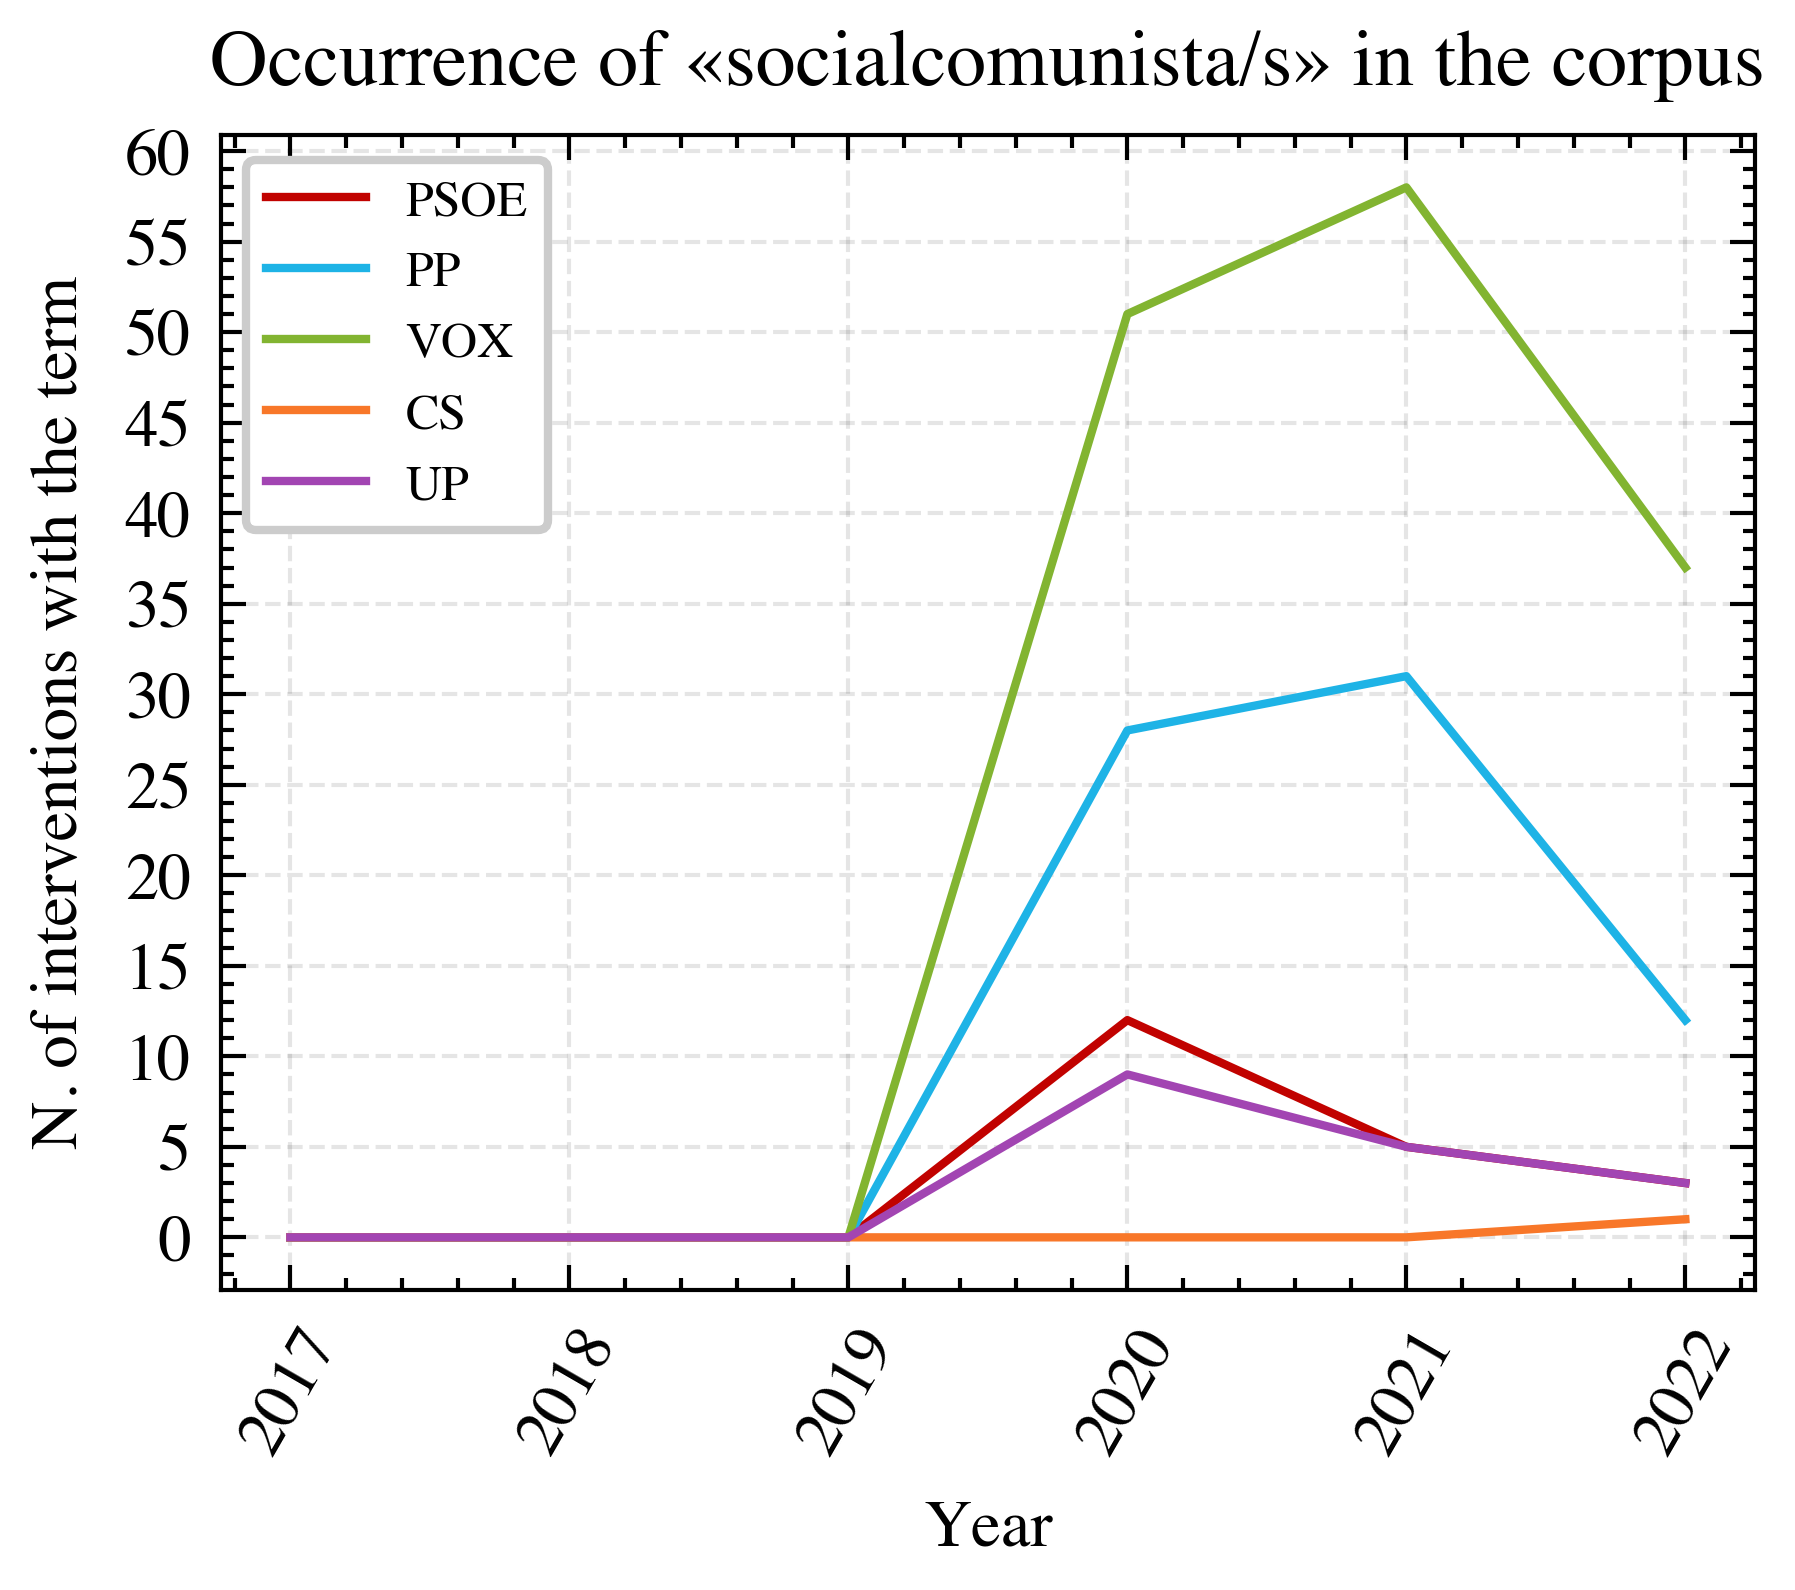

In [158]:
# Socialcomunista/s.

fig, ax = plt.subplots()

years = [2017, 2018, 2019, 2020, 2021, 2022]
PSOE = [0, 0, 0, 12, 5, 3]
UP = [0, 0, 0, 9, 5, 3]
PP = [0, 0, 0, 28, 31, 12]
VOX = [0, 0, 0, 51, 58, 37]
CS = [0, 0, 0, 0, 0, 1]

ax.plot(years, PSOE, label='PSOE', c='#c10200')
ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
ax.plot(years, UP, label='UP', c='#a245b2')

ax.set_xticks(years)
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'N. of interventions with the term')
ax.set_title(f'Occurrence of «socialcomunista/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_77723/986663840.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


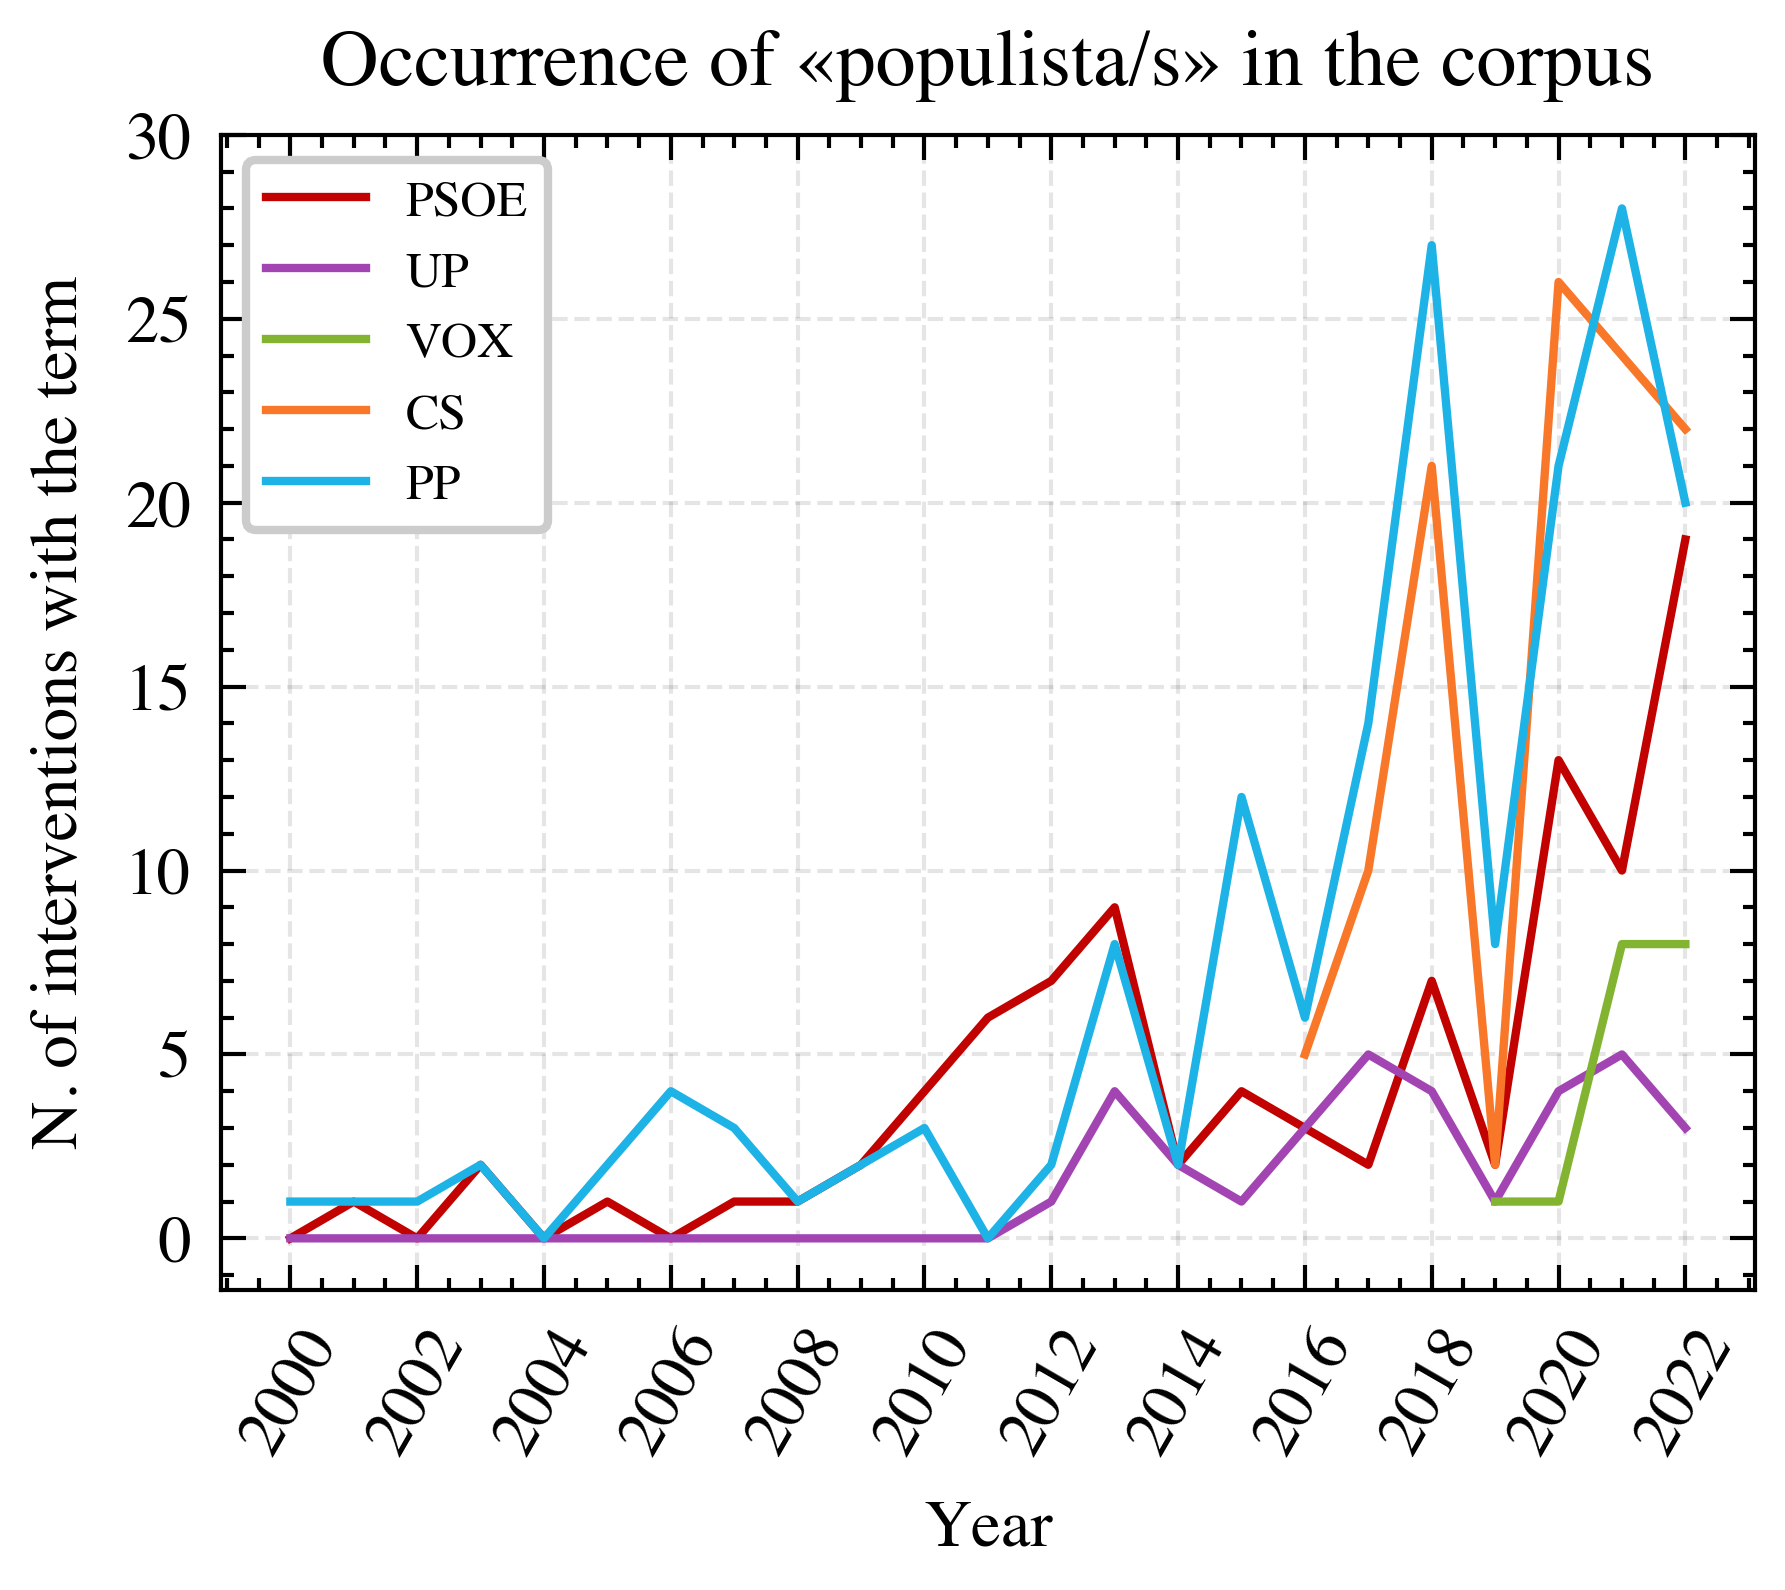

In [152]:
# Populista/s.

fig, ax = plt.subplots()

years = [2000, 2001, 2002, 2003, 2004, 
         2005, 2006, 2007, 2008, 2009, 
         2010, 2011, 2012, 2013, 2014, 
         2015, 2016, 2017, 2018, 2019, 
         2020, 2021, 2022]

PSOE = [0, 1, 0, 2, 0, 
        1, 0, 1, 1, 2, 
        4, 6, 7, 9, 2, 
        4, 3, 2, 7, 2, 
        13, 10, 19]

PP = [1, 1, 1, 2, 0, 
      2, 4, 3, 1, 2, 
      3, 0, 2, 8, 2, 
      12,6,14,27, 8,
      21,28, 20]

UP = [0, 0, 0, 0, 0,
      0, 0, 0, 0, 0,
      0, 0, 1, 4, 2,
      1, 3, 5, 4, 1,
      4, 5, 3]

VOX = [np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, 1,
       1, 8, 8]

CS =  [np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, 5, 10, 21, 2,
       26, 24, 22]

ax.plot(years, PSOE, label='PSOE', c='#c10200')
ax.plot(years, UP, label='UP', c='#a245b2')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
ax.plot(years, PP, label='PP', c='#1eb3e6')


ax.set_xticks(years)
ax.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
               2022])
ax.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
                    2022], rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'N. of interventions with the term')
ax.set_title(f'Occurrence of «populista/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()
